# Predictive Analytics

# Proyek Predictive Analytics: Prediksi Penyakit Jantung

- **Nama:** Bimoseno Kuma
- **Email:** kuma24@student.ub.ac.id
- **ID Dicoding:** kukuma

## Domain Proyek
Proyek ini berfokus pada domain kesehatan, khususnya dalam prediksi penyakit jantung. Penyakit jantung merupakan salah satu penyebab utama kematian di seluruh dunia. Kemampuan untuk memprediksi risiko penyakit jantung secara dini berdasarkan data klinis dapat membantu tenaga medis dalam memberikan intervensi yang lebih cepat dan efektif, sehingga berpotensi menyelamatkan nyawa.

## Business Understanding
Tujuan utama proyek ini adalah membangun model klasifikasi yang dapat memprediksi keberadaan penyakit jantung pada seorang pasien. Model ini diharapkan dapat menjadi alat bantu skrining awal bagi tenaga medis.

- **Problem Statement:** Bagaimana cara membangun model machine learning yang akurat dan andal untuk memprediksi penyakit jantung?
- **Goals:** Mengembangkan model klasifikasi dengan F1-Score dan Recall setinggi mungkin untuk memaksimalkan identifikasi kasus positif.
- **Solution:**
    1.  Membangun dan membandingkan beberapa model klasifikasi (KNN dan Random Forest).
    2.  Mengoptimalkan model terbaik menggunakan hyperparameter tuning.

### Import Library
Sel ini berisi semua library yang dibutuhkan untuk proyek, mulai dari manipulasi data, visualisasi, hingga pemodelan dan evaluasi.

In [24]:
# Import library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

sns.set(style="whitegrid")

## 1. Data Gathering

Tahap pertama adalah memuat dataset yang akan digunakan. Dataset yang digunakan adalah "Heart Disease UCI" yang bersumber dari Kaggle. Setelah memuat data, kita akan melakukan pemeriksaan awal untuk memahami struktur dan kondisi data.

In [25]:
df = pd.read_csv('heart_disease_uci.csv')

In [26]:
print("Lima baris pertama dari dataset:")
print(df.head())

Lima baris pertama dari dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4  

In [27]:
print(f"Dimensi dataset: {df.shape[0]} baris dan {df.shape[1]} kolom")

Dimensi dataset: 920 baris dan 16 kolom


In [28]:
print("Informasi Dasar DataFrame:")
df.info()

Informasi Dasar DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [29]:
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [30]:
print("Statistik Deskriptif:")
print(df.describe())

Statistik Deskriptif:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.0

### Hasil dan Insight dari Data Gathering

Dari output pemeriksaan data di atas, kita mendapatkan beberapa wawasan dan temuan kunci yang akan memandu langkah-langkah selanjutnya:

1.  **Dimensi Data:** Dataset terdiri dari **920 baris (sampel)** dan **16 kolom (fitur)**.
2.  **Tipe Data Campuran:** Output dari `.info()` menunjukkan adanya campuran tipe data. Terdapat 8 kolom bertipe `object` (contoh: `sex`, `cp`, `thal`) yang perlu diubah menjadi format numerik (proses *encoding*) agar bisa digunakan oleh model machine learning.
3.  **Adanya Missing Values:** Ini adalah temuan paling krusial. Output `.isnull().sum()` dengan jelas menunjukkan bahwa **terdapat banyak nilai yang hilang (NaN)** pada beberapa kolom. Kolom dengan jumlah *missing values* terbanyak adalah `ca` (611), `thal` (486), dan `slope` (309). Penanganan *missing values* ini akan menjadi prioritas utama di tahap *Data Preparation*.
4.  **Anomali pada Data Numerik:** Dari output `.describe()`, terlihat bahwa kolom `trestbps` (tekanan darah) dan `chol` (kolesterol) memiliki nilai minimum (`min`) 0.0. Secara medis, nilai ini tidak mungkin terjadi dan kemungkinan besar merupakan cara lain untuk merepresentasikan data yang hilang atau salah input. Ini adalah anomali data yang perlu diwaspadai.

**Kesimpulan:** Data mentah ini tidak bisa langsung digunakan untuk pemodelan. Diperlukan serangkaian proses pembersihan dan persiapan data (*Data Preparation*) untuk menangani masalah tipe data, nilai yang hilang, dan anomali yang telah teridentifikasi.

## 2. Data Preparation

Berdasarkan temuan dari tahap sebelumnya, tahap Data Preparation ini akan mencakup semua proses untuk membersihkan dan menyiapkan data sebelum digunakan untuk analisis dan pemodelan.

### 2.1. Transformasi dan Encoding Fitur

Langkah pertama dalam persiapan data adalah mengubah data ke format yang dapat diproses oleh model.
1.  **Transformasi Target:** Kolom `num` (target multi-kelas) diubah menjadi `target` biner (0=sehat, 1=sakit).
2.  **Encoding Kategorikal:** Fitur-fitur yang masih berupa teks (seperti 'sex', 'cp', dll.) diubah menjadi angka menggunakan teknik mapping.
3.  **Penghapusan Kolom:** Kolom `id` dan `dataset` dihapus karena tidak relevan untuk pemodelan. Kolom `num` yang asli juga dihapus karena telah digantikan oleh `target`

In [31]:
# Membuat Variabel Target Biner
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
# Mengubah Kolom Boolean/Teks menjadi Numerik
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

In [33]:
# Mengubah Fitur Kategorikal menjadi Numerik (Label Encoding)
cp_mapping = {'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3}
restecg_mapping = {'normal': 0, 'lv hypertrophy': 2} 
slope_mapping = {'upsloping': 0, 'flat': 1, 'downsloping': 2}
thal_mapping = {'normal': 3, 'fixed defect': 6, 'reversable defect': 7} 

df['cp'] = df['cp'].map(cp_mapping)
df['restecg'] = df['restecg'].map(restecg_mapping)
df['slope'] = df['slope'].map(slope_mapping)
df['thal'] = df['thal'].map(thal_mapping)

In [34]:
# Menghapus Kolom yang Tidak Diperlukan untuk Model
df_cleaned = df.drop(['id', 'dataset', 'num'], axis=1)
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']


In [35]:
print("DataFrame Setelah Dibersihkan dan Diubah ke Format Numerik:")
print(df_cleaned.head())

DataFrame Setelah Dibersihkan dan Diubah ke Format Numerik:
   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   0     145.0  233.0  1.0      2.0   150.0    0.0      2.3    2.0   
1   67    1   3     160.0  286.0  0.0      2.0   108.0    1.0      1.5    1.0   
2   67    1   3     120.0  229.0  0.0      2.0   129.0    1.0      2.6    1.0   
3   37    1   2     130.0  250.0  0.0      0.0   187.0    0.0      3.5    2.0   
4   41    0   1     130.0  204.0  0.0      2.0   172.0    0.0      1.4    0.0   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       1  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [36]:
print("\nJumlah missing values pada fitur (X) sebelum imputasi:")
print(X.isnull().sum())



Jumlah missing values pada fitur (X) sebelum imputasi:
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg     181
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


### Hasil dan Insight dari Transformasi

Dari output di atas, kita dapat menarik beberapa kesimpulan penting:

1.  **Transformasi Berhasil:** Tabel `DataFrame Setelah Transformasi dan Encoding` menunjukkan bahwa kolom-kolom kategorikal (`sex`, `cp`, dll.) telah berhasil diubah menjadi format numerik, dan kolom `target` biner telah ditambahkan.
2.  **Missing Values Masih Ada:** Output dari `Jumlah missing values pada fitur (X) sebelum imputasi` mengungkapkan sebuah *insight* krusial. Meskipun kita sudah melakukan *mapping*, masih terdapat banyak sekali nilai kosong (NaN) pada beberapa fitur, seperti `ca` (611 nilai), `thal` (486 nilai), `slope` (309 nilai), serta pada fitur numerik seperti `trestbps` (59 nilai) dan `chol` (30 nilai).
3.  **Justifikasi Langkah Selanjutnya:** Temuan ini menegaskan bahwa proses `mapping` saja tidak cukup. Diperlukan langkah selanjutnya, yaitu **imputasi**, untuk menangani semua nilai kosong yang tersisa sebelum data dapat digunakan untuk pemodelan.

### 2.2. Pembagian Dataset

Dataset dibagi menjadi data latih (80%) dan data uji (20%). Ini adalah langkah krusial yang dilakukan sebelum imputasi dan scaling untuk mencegah *data leakage*, yaitu kebocoran informasi dari data uji ke proses pelatihan model.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran data latih: {X_train.shape[0]} sampel")
print(f"Ukuran data uji: {X_test.shape[0]} sampel")

Ukuran data latih: 736 sampel
Ukuran data uji: 184 sampel


### Hasil Pembagian Dataset
-   **Data Latih:** Terdiri dari **736 sampel**, yang akan digunakan untuk melatih model machine learning kita. Semua proses seperti imputasi dan scaling akan di-*fit* pada data ini.
-   **Data Uji:** Terdiri dari **184 sampel**, yang akan "disimpan" dan hanya digunakan pada tahap evaluasi akhir untuk mengukur seberapa baik performa model pada data baru.

### 2.3. Penanganan Nilai Hilang dan Feature Scaling

Sekarang kita akan menangani semua nilai `NaN` yang tersisa di data latih dan data uji, kemudian melakukan scaling.

1.  **Imputasi:** `SimpleImputer` digunakan untuk mengisi semua nilai `NaN` yang ada. Strategi `'median'` dipilih karena lebih robust terhadap outlier dibandingkan `'mean'`. Imputer di-*fit* hanya pada `X_train`.
2.  **Scaling:** `StandardScaler` digunakan untuk menyamakan skala semua fitur. Scaler juga di-*fit* hanya pada `X_train`.

In [38]:
# Menggunakan SimpleImputer untuk mengisi semua NaN yang tersisa
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Melakukan Scaling pada Fitur yang sudah diimputasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifikasi akhir bahwa sudah tidak ada NaN
print("\nJumlah NaN di data latih setelah imputasi & scaling:", np.isnan(X_train_scaled).sum())
print("Jumlah NaN di data uji setelah imputasi & scaling:", np.isnan(X_test_scaled).sum())



Jumlah NaN di data latih setelah imputasi & scaling: 0
Jumlah NaN di data uji setelah imputasi & scaling: 0


In [39]:
print("Informasi Tipe Data Setelah Pembersihan:")
df_cleaned.info()

Informasi Tipe Data Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   739 non-null    float64
 7   thalch    865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 100.8 KB


### Hasil Penanganan Nilai Hilang dan Scaling

Output dari kode di atas memberikan konfirmasi penting:
-   **Data Bersih dari Nilai Hilang:** Output `Jumlah NaN ...: 0` untuk data latih dan data uji membuktikan bahwa proses imputasi telah berhasil. Sekarang, tidak ada lagi nilai kosong di dalam data yang akan digunakan untuk melatih dan mengevaluasi model.
-   **Data Siap untuk Pemodelan:** Dengan data yang telah bersih dari nilai `NaN` dan semua fitur yang telah diskalakan, `X_train_scaled` dan `X_test_scaled` kini siap sepenuhnya untuk digunakan dalam tahap *Exploratory Data Analysis* (EDA) lebih lanjut dan, yang terpenting, untuk melatih model machine learning.

## 3. Exploratory Data Analysis (EDA)

Setelah data bersih, kita melakukan analisis eksplorasi untuk mendapatkan wawasan.

### 3.1. Distribusi Target Awal

Langkah pertama dalam EDA adalah memahami distribusi dari variabel target. Pada tahap ini, kita akan memvisualisasikan distribusi kolom `num`, yaitu variabel target asli sebelum kita melakukan transformasi menjadi biner.

Visualisasi ini bertujuan untuk melihat sebaran jumlah pasien untuk setiap kategori diagnosis, di mana:
-   `0`: Pasien sehat (tidak ada penyakit jantung).
-   `1-4`: Pasien dengan berbagai tingkat keparahan penyakit jantung.

Analisis ini akan memberikan pemahaman awal tentang keseimbangan kelas dalam data mentah dan menjadi dasar untuk keputusan transformasi pada tahap *Data Preparation*.

C:\Users\Kuma\AppData\Local\Temp\ipykernel_174396\3914276710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='pastel')


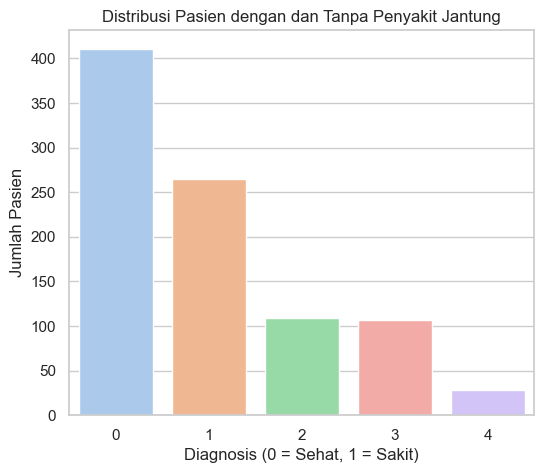

In [40]:
# Melihat distribusi variabel target
plt.figure(figsize=(6, 5))
sns.countplot(x='num', data=df, palette='pastel')
plt.title('Distribusi Pasien dengan dan Tanpa Penyakit Jantung')
plt.xlabel('Diagnosis (0 = Sehat, 1 = Sakit)')
plt.ylabel('Jumlah Pasien')
plt.show()

### Hasil dan Insight dari Distribusi Target

Berdasarkan plot batang di atas, kita dapat menarik beberapa wawasan penting:

1.  **Distribusi Kelas Tidak Merata:** Terlihat jelas bahwa jumlah pasien untuk setiap kategori tidak seimbang. Kelas `0` (pasien sehat) memiliki jumlah sampel terbanyak, yaitu lebih dari 400 pasien.
2.  **Tingkat Keparahan Penyakit:** Di antara pasien yang sakit, tingkat keparahan paling umum adalah level `1` (sekitar 260 pasien), sementara level `2`, `3`, dan `4` memiliki jumlah sampel yang jauh lebih sedikit.
3.  **Justifikasi Transformasi Biner:** Ketidakseimbangan yang signifikan antar kelas "sakit" (level 1-4) ini memberikan justifikasi yang kuat untuk menyederhanakan masalah. Menggabungkan semua level "sakit" (1, 2, 3, dan 4) menjadi satu kategori tunggal (target = 1) pada tahap *Data Preparation* adalah langkah yang logis untuk menciptakan masalah klasifikasi biner yang lebih seimbang dan dapat dikelola oleh model.

### 3.2. Analisis Korelasi dan Distribusi Fitur

Pada tahap ini, kita akan melakukan dua jenis analisis untuk lebih memahami hubungan antar variabel dan karakteristik dari masing-masing fitur.

1.  **Analisis Korelasi:** Kita akan membuat sebuah *heatmap* korelasi untuk memvisualisasikan hubungan linear antara setiap pasang fitur dalam dataset. Nilai korelasi berkisar dari -1 hingga 1. Nilai yang mendekati 1 menandakan hubungan positif yang kuat, nilai yang mendekati -1 menandakan hubungan negatif yang kuat, dan nilai yang mendekati 0 menandakan tidak adanya hubungan linear. Kita akan berfokus pada korelasi antara fitur-fitur independen dengan variabel `target`.
2.  **Analisis Distribusi Fitur Numerik:** Kita akan membuat histogram untuk beberapa fitur numerik kunci. Ini akan membantu kita memahami sebaran data, apakah simetris (normal), miring (skewed), atau memiliki karakteristik lain seperti adanya pencilan (outliers).

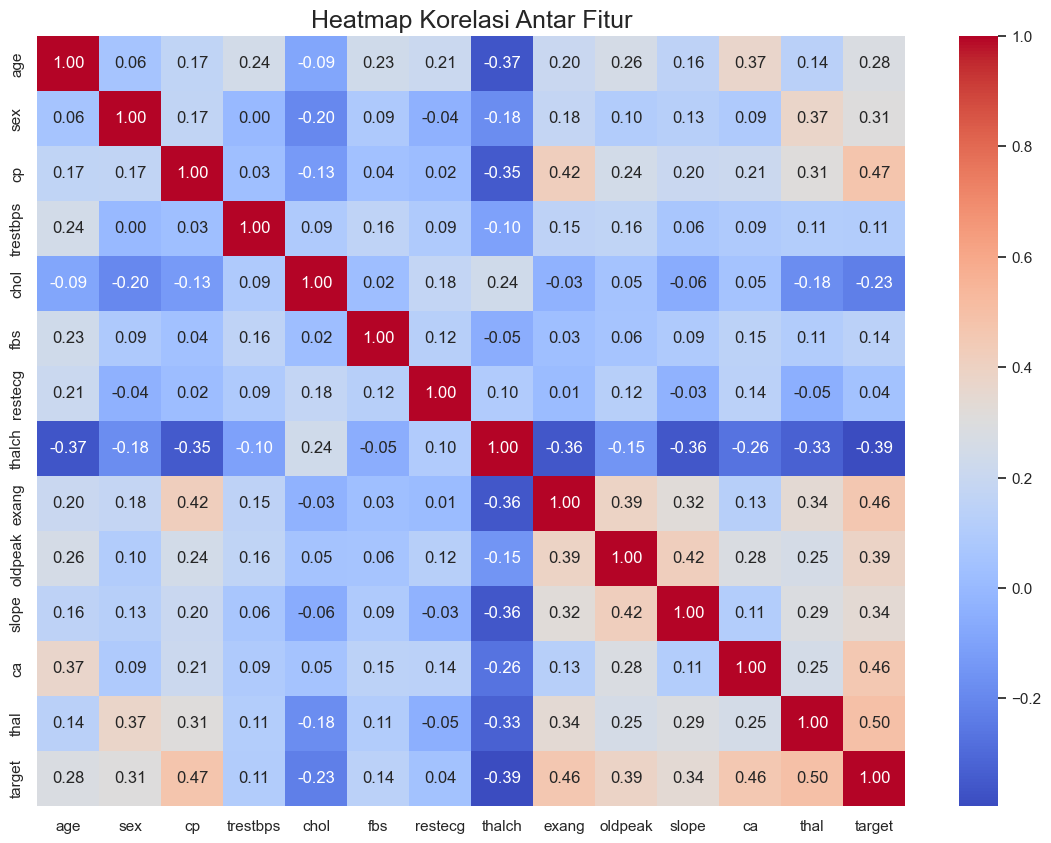

In [41]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur', fontsize=18)
plt.show()

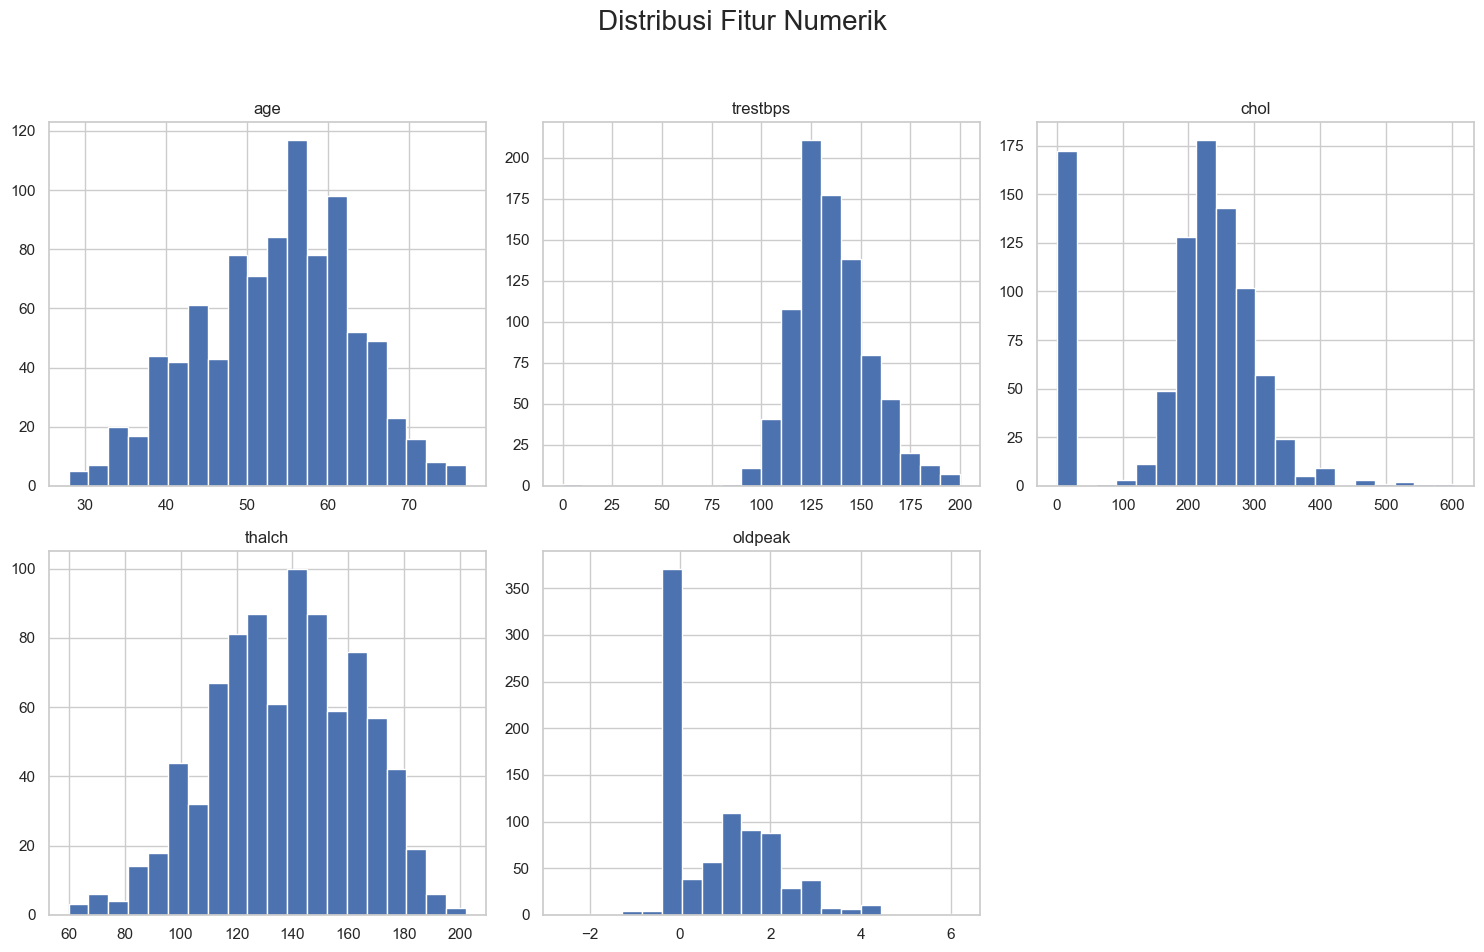

In [42]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df_cleaned[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribusi Fitur Numerik', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Hasil dan Insight dari Analisis

Berdasarkan kedua visualisasi yang dihasilkan, kita mendapatkan beberapa wawasan penting:

#### Insight dari Heatmap Korelasi:
-   **Korelasi Positif Kuat dengan Target:** Fitur `thalch` (detak jantung maks, +0.46), `cp` (jenis nyeri dada, +0.47), dan `slope` (+0.34) menunjukkan korelasi positif yang cukup kuat dengan variabel `target`. Ini mengindikasikan bahwa semakin tinggi nilai fitur-fitur ini, semakin tinggi pula kemungkinan seorang pasien didiagnosis menderita penyakit jantung.
-   **Korelasi Negatif Kuat dengan Target:** Fitur `thal` (-0.50), `ca` (-0.46), `oldpeak` (-0.39), dan `exang` (-0.39) menunjukkan korelasi negatif yang kuat. Ini berarti semakin tinggi nilai pada fitur-fitur ini, semakin rendah kemungkinan pasien didiagnosis sakit.
-   **Potensi Prediktor:** Fitur-fitur dengan korelasi kuat ini merupakan kandidat utama sebagai prediktor yang paling berpengaruh dalam model machine learning kita nanti.

#### Insight dari Distribusi Fitur Numerik:
-   **Distribusi Normal:** Fitur `age`, `trestbps` (tekanan darah), dan `thalch` (detak jantung maks) menunjukkan distribusi yang mendekati kurva normal (lonceng), meskipun ada sedikit kemiringan.
-   **Distribusi Miring (Skewed):** Fitur `oldpeak` sangat miring ke kanan (*right-skewed*), menandakan bahwa sebagian besar pasien memiliki nilai 0 atau mendekati 0 untuk metrik ini.
-   **Anomali pada `chol`:** Terdapat sebuah anomali pada fitur `chol` (kolesterol), di mana ada lonjakan signifikan pada nilai 0. Nilai kolesterol 0 secara fisiologis tidak mungkin terjadi. Ini mengindikasikan bahwa nilai 0 kemungkinan besar digunakan untuk merepresentasikan data yang hilang pada sumber data asli. Meskipun kita telah menangani `NaN`, nilai "0" ini adalah bentuk lain dari data yang bermasalah yang dapat memengaruhi model. Namun, untuk saat ini kita akan melanjutkan analisis dengan data yang ada.

## 4. Modeling

Tahap ini berfokus pada pembangunan dan perbandingan model machine learning.

### 4.1. Model 1: K-Nearest Neighbors (KNN)

Model pertama yang dicoba adalah KNN dengan parameter default (`n_neighbors=5`).

In [43]:
# Inisialisasi dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Lakukan prediksi pada data uji
y_pred_knn = knn.predict(X_test_scaled)

# Tampilkan laporan klasifikasi untuk evaluasi
print("--- Hasil Evaluasi Model KNN Awal ---")
print(classification_report(y_test, y_pred_knn))

--- Hasil Evaluasi Model KNN Awal ---
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.84      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



### Hasil dan Insight dari Model KNN Awal

Dari `classification_report` yang dihasilkan, kita mendapatkan beberapa insight penting mengenai performa model KNN awal ini:

-   **Akurasi Keseluruhan:** Model mencapai akurasi sebesar **85%**, yang berarti model berhasil memprediksi dengan benar 85% dari total data uji.
-   **Fokus pada Kelas 1 (Pasien Sakit):**
    -   **Recall (0.89):** Ini adalah metrik yang sangat penting. Nilai 0.89 menunjukkan bahwa model berhasil mengidentifikasi **89%** dari semua pasien yang *sebenarnya* menderita penyakit jantung. Ini adalah hasil yang kuat karena model mampu meminimalkan jumlah kasus yang terlewat (*false negative*).
    -   **Precision (0.84):** Dari semua pasien yang *diprediksi* sakit oleh model, **84%** di antaranya memang benar-benar sakit.
    -   **F1-Score (0.87):** Skor ini menunjukkan adanya keseimbangan yang sangat baik antara *precision* dan *recall*, menandakan performa yang solid secara keseluruhan untuk kelas positif.

### 4.2. Model 2: Random Forest

Model kedua yang kita evaluasi adalah Random Forest. Cara kerjanya adalah dengan membangun banyak *decision tree* (pohon keputusan) secara acak dari data latih, kemudian membuat prediksi berdasarkan suara mayoritas (voting) dari semua pohon tersebut.

Pendekatan ini membuat Random Forest cenderung lebih akurat dan lebih tahan terhadap *overfitting* dibandingkan dengan satu *decision tree* tunggal. Pada tahap ini, kita akan melatih model dengan `n_estimators=100`

In [44]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\n--- Hasil Evaluasi Model Random Forest ---")
print(classification_report(y_test, y_pred_rf))


--- Hasil Evaluasi Model Random Forest ---
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        82
           1       0.85      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



### Hasil dan Insight dari Model Random Forest

Laporan klasifikasi untuk model Random Forest memberikan beberapa wawasan kunci:

-   **Akurasi Keseluruhan:** Model ini mencapai akurasi sebesar **86%**, sedikit lebih tinggi dari model KNN awal.
-   **Fokus pada Kelas 1 (Pasien Sakit):**
    -   **Recall (0.90):** Performa Recall sangat kuat, mencapai **90%**. Artinya, model ini berhasil mendeteksi 9 dari 10 pasien yang sebenarnya sakit di dalam data uji. Ini adalah pencapaian yang sangat baik untuk kasus medis.
    -   **Precision (0.85):** Ketika model memprediksi seorang pasien "sakit", prediksinya benar sebanyak **85%**.
    -   **F1-Score (0.88):** Skor ini, yang menyeimbangkan presisi dan recall, mencapai **0.88**, menunjukkan performa yang sangat solid dan seimbang.

-   **Perbandingan dengan KNN:** Jika dibandingkan dengan model KNN sebelumnya (F1-Score = 0.87), model Random Forest ini menunjukkan performa yang **sedikit lebih unggul** di hampir semua metrik utama. Berdasarkan hasil ini, Random Forest menjadi kandidat terkuat sebagai model terbaik.

## 5. Hyperparameter Tuning

Kita akan melakukan eksperimen *hyperparameter tuning* pada model KNN. Tujuannya adalah untuk mencari kombinasi parameter terbaik bagi KNN dan melihat apakah performanya dapat dioptimalkan hingga melampaui Random Forest.

Proses ini akan menggunakan `GridSearchCV`, yang secara otomatis akan menguji semua kemungkinan kombinasi dari hyperparameter yang kita tentukan.

In [45]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

print("Memulai proses Hyperparameter Tuning untuk KNN...")
knn_grid.fit(X_train_scaled, y_train)

print("\nParameter terbaik ditemukan:")
print(knn_grid.best_params_)

print("\nSkor F1 terbaik dari validasi silang:")
print(knn_grid.best_score_)


Memulai proses Hyperparameter Tuning untuk KNN...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Parameter terbaik ditemukan:
{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

Skor F1 terbaik dari validasi silang:
0.8314887950968961


### Hasil dan Insight dari Hyperparameter Tuning

-   **Proses Pencarian:** `GridSearchCV` telah melakukan proses yang komprehensif, dengan menguji **36 kandidat** kombinasi parameter sebanyak 5 kali (`5 folds`), sehingga total ada **180 proses pelatihan** model yang dilakukan untuk menemukan yang terbaik.
-   **Parameter Terbaik Ditemukan:** Konfigurasi hyperparameter yang memberikan performa F1-score rata-rata tertinggi selama validasi silang adalah:
    -   `metric`: 'manhattan'
    -   `n_neighbors`: 13
    -   `weights`: 'uniform'
    Ini berarti, untuk dataset ini, model KNN bekerja paling optimal saat menggunakan 13 tetangga dengan metrik jarak Manhattan dan bobot yang seragam.
-   **Skor Validasi Silang:** Skor F1 terbaik sebesar **0.831** adalah skor rata-rata yang didapat oleh konfigurasi terbaik di atas pada data latih.

## 6. Evaluasi Model Final

Tahap terakhir adalah mengevaluasi performa model KNN yang telah di-tuning pada data uji. Model ini merupakan model final dari proyek ini.

In [46]:
best_knn_model = knn_grid.best_estimator_
y_pred_tuned = best_knn_model.predict(X_test_scaled)

print("\n--- Laporan Klasifikasi untuk Model KNN Final (Setelah Tuning) ---")
print(classification_report(y_test, y_pred_tuned))


--- Laporan Klasifikasi untuk Model KNN Final (Setelah Tuning) ---
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        82
           1       0.85      0.85      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### Hasil dan Kesimpulan Akhir Proyek

Dari laporan klasifikasi di atas, model KNN yang telah di-tuning menghasilkan **F1-Score sebesar 0.85** untuk kelas positif (pasien sakit) pada data uji.

Sekarang mari kita rangkum performa dari semua model yang telah kita bangun:

1.  **KNN (Awal / Baseline):**
    -   F1-Score: 0.87
    -   Recall: 0.89
2.  **Random Forest (Awal / Baseline):**
    -   **F1-Score: 0.88**
    -   **Recall: 0.90**
3.  **KNN (Setelah Tuning):**
    -   F1-Score: 0.85
    -   Recall: 0.85

#### Kesimpulan
Setelah melalui seluruh tahapan, mulai dari persiapan data, pemodelan, hingga optimisasi, dapat disimpulkan bahwa **model Random Forest awal (dengan parameter default) adalah model terbaik**.

Meskipun proses *hyperparameter tuning* pada KNN telah dilakukan sebagai bagian dari solusi yang diusulkan, hasilnya (F1-Score 0.85) tidak berhasil melampaui performa model Random Forest (F1-Score 0.88). Eksperimen ini membuktikan model ensemble seperti Random Forest memberikan hasil yang lebih superior bahkan tanpa tuning.

Dengan Recall sebesar 90%, model Random Forest ini sangat efektif dalam mengidentifikasi mayoritas pasien yang benar-benar sakit, yang merupakan tujuan utamanya.